# Titanic ship case study

### Problem Description:
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper- class.<\li>
The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills

# 1.Dowloaded the dataset from the given link

# 2.Loading the dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('titanic.csv')

# 3.Perform Below Visualizations


 Univariate Analysis

C:\Users\ariva\AppData\Local\Temp\ipykernel_6252\428353805.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color = 'r') #Distribution plot


<Axes: xlabel='age', ylabel='Density'>

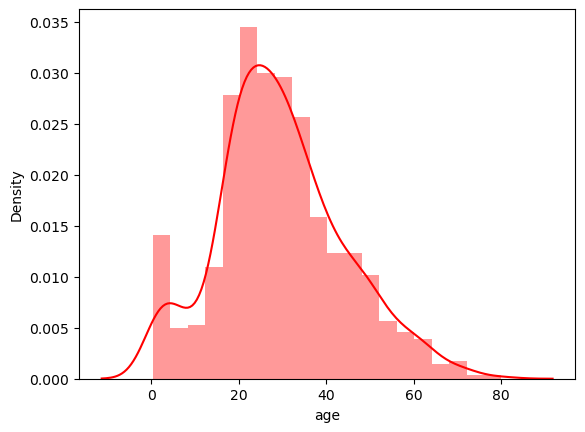

In [2]:
sns.distplot(data['age'], color = 'r') #Distribution plot

<Axes: >

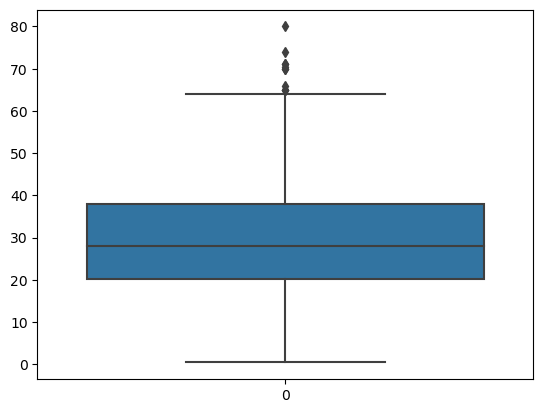

In [3]:
sns.boxplot(data['age']) #box plot

<Axes: ylabel='age'>

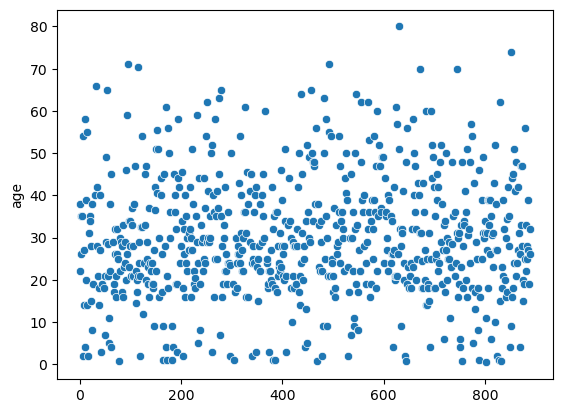

In [4]:
sns.scatterplot(data['age']) #scatter plot

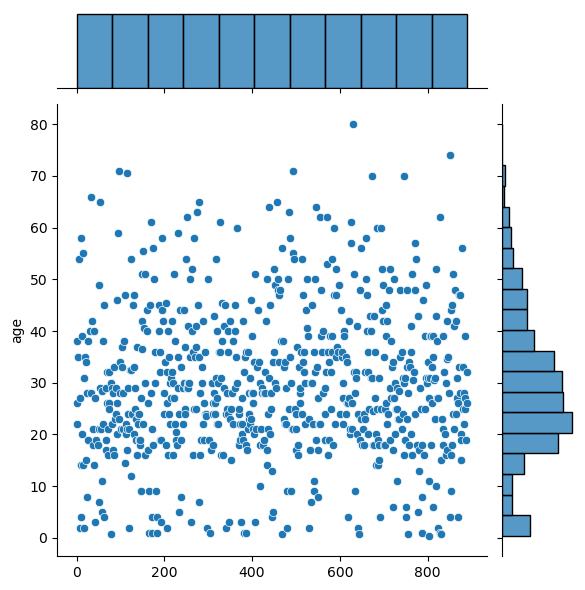

In [5]:
sns.jointplot(data['age']) #joint plot

<Axes: >

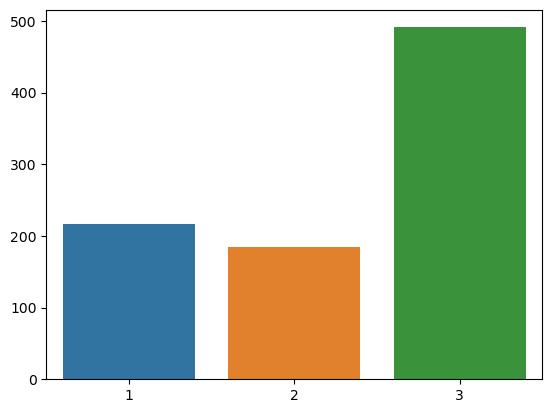

In [6]:
x = data.pclass.value_counts()               #Bar plot
sns.barplot(x=x.index, y=x.values)

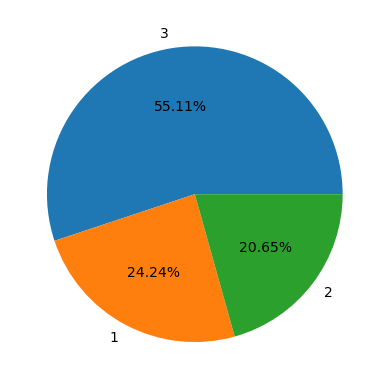

In [7]:
x = data['pclass'].value_counts()                  #Pie chart
plt.pie(x.values,labels=x.index,autopct='%.2f%%')
plt.show()

### Bi - Variate Analysis

<Axes: xlabel='pclass', ylabel='fare'>

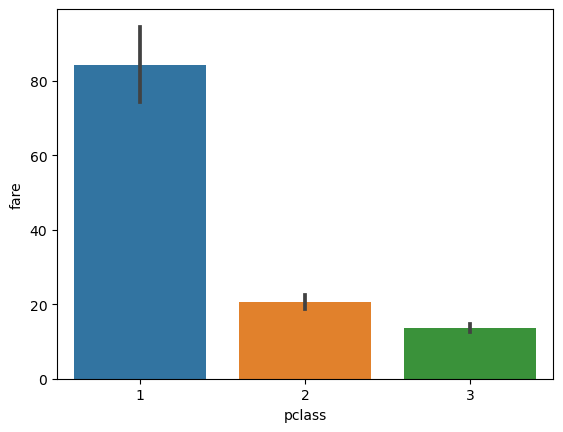

In [8]:
sns.barplot(x=data.pclass, y=data.fare)    #Bar plot

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


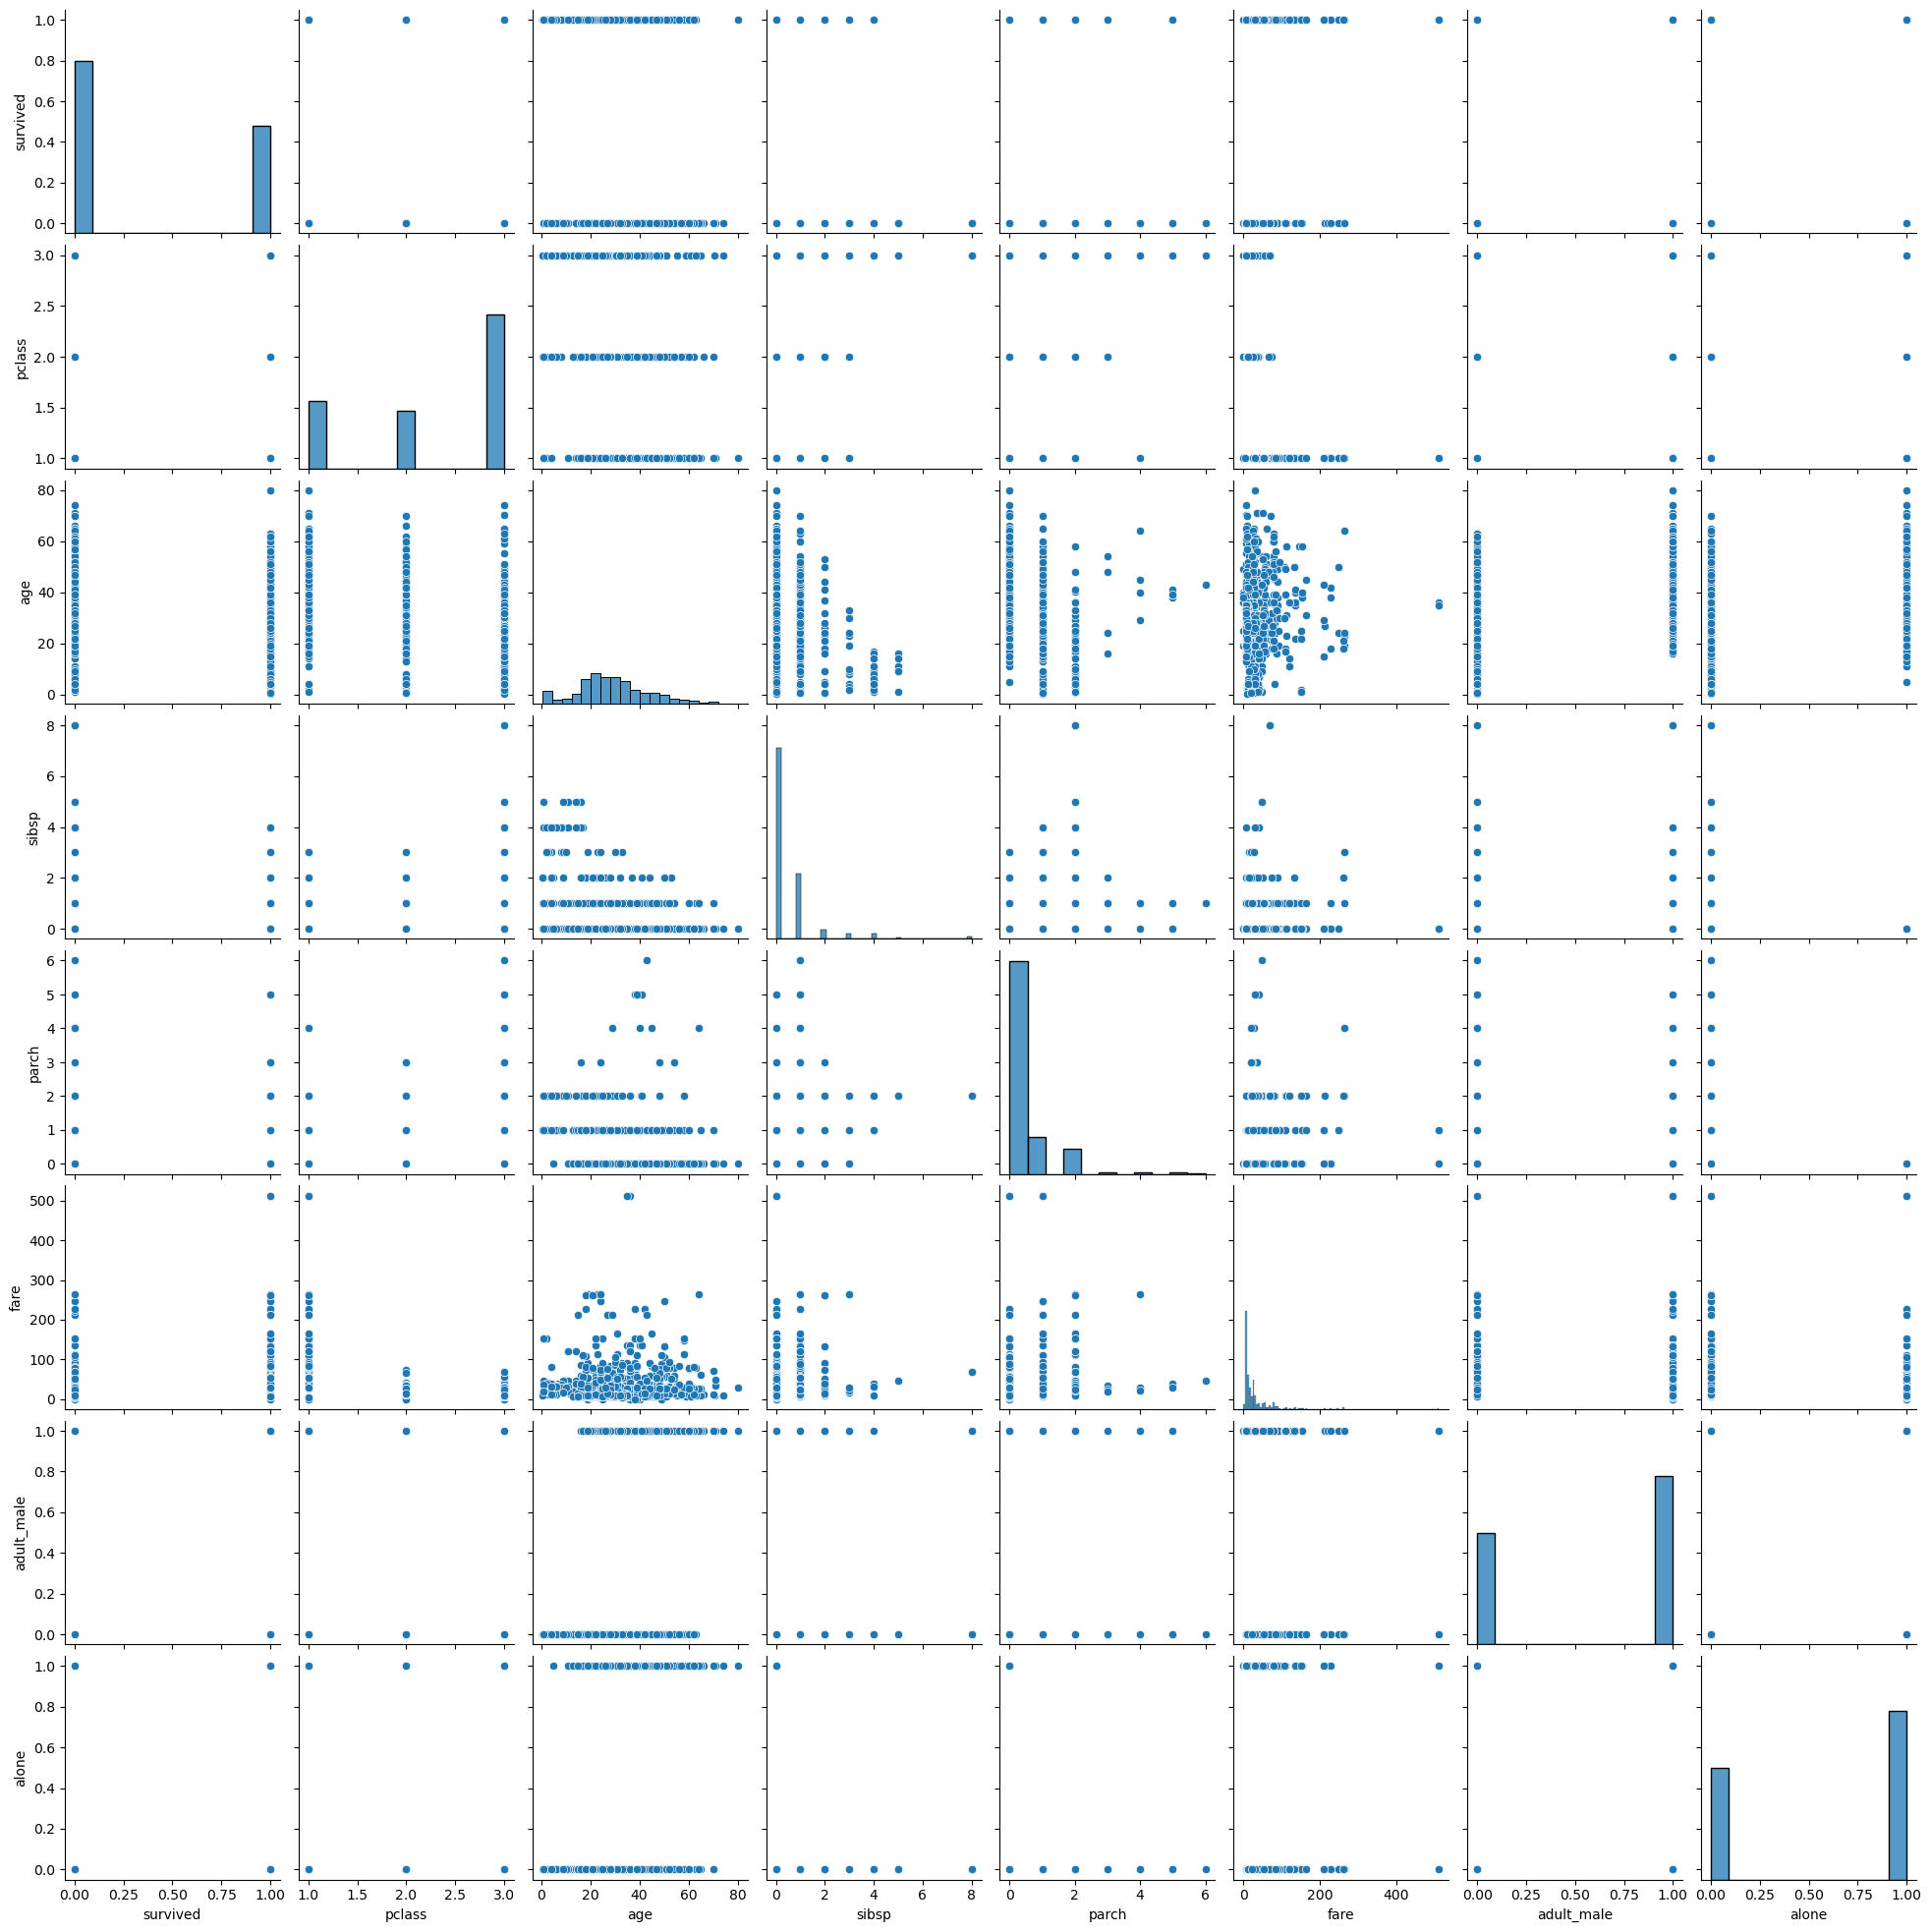

In [9]:
sns.pairplot(data)                   #Pair plot

 ### Multi - Variate Analysis

C:\Users\ariva\AppData\Local\Temp\ipykernel_6252\3729086963.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)        #Heat map


<Axes: >

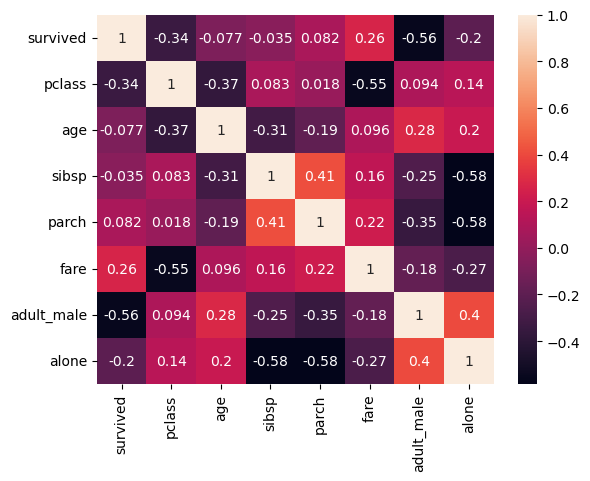

In [10]:
sns.heatmap(data.corr(), annot=True)        #Heat map

#  4.Perform descriptive statistics on the dataset

### basic information about the dataset

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


### count, mean, standard deviation, minimum, maximum, and quartiles for numerical variables


In [12]:
stats = data['age'].describe()
print(stats)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


### mode

In [13]:
data['age'].mode()

0    24.0
Name: age, dtype: float64

### range

In [14]:
data['age'].max()-data['age'].min()

79.58

### skewness

In [15]:
data['age'].skew()

0.38910778230082704

# 5.Handling the missing values

In [16]:
print(data.isnull().sum())
print('-------------')
data.dropna(inplace=True)
data.shape

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
-------------


(182, 15)

# 6.Find the outliers and replace the outliers

In [23]:
def replace(data, variable, threshold):
    z_scores = np.abs((data[variable] - data[variable].mean()) / data[variable].std())
    outliers = data[z_scores > threshold]
    data.loc[z_scores > threshold, variable] = data[variable].mean()
    return outliers
zscore_threshold = 3

for column in data.select_dtypes(include=np.number):
    outliers = replace(data, column, zscore_threshold)
    print("Outliers in", column, ":", outliers)

print("\nData after replacing outliers:\n", data)


Outliers in survived : Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []
Outliers in pclass :      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
21        1.0     2.0    male  34.0    0.0    0.0  13.0000        S  Second   
66        1.0     2.0  female  29.0    0.0    0.0  10.5000        S  Second   
123       1.0     2.0  female  32.5    0.0    0.0  13.0000        S  Second   
148       0.0     2.0    male  36.5    0.0    2.0  26.0000        S  Second   
183       1.0     2.0    male   1.0    2.0    1.0  39.0000        S  Second   
193       1.0     2.0    male   3.0    1.0    1.0  26.0000        S  Second   
292       0.0     2.0    male  36.0    0.0    0.0  12.8750        C  Second   
327       1.0     2.0  female  36.0    0.0    0.0  13.0000        S  Second   
340       1.0     2.0    male   2.0    1.0    1.0  26.0000        S  Second   
345       1.0  

# 7.Check for Categorical columns and perform encoding.

In [ ]:
cc=data.select_dtypes(include='object').columns

enc=pd.get_dummies(data,columns=cc)

print(enc.head(10))


# 8.Split the data into dependent and independent variables

In [ ]:
X = data.drop('survived', axis=1)  
y = data['survived']

print(X.head())

print(y.head())


# 9.Scale the independent variables

In [ ]:
X = data.drop('survived', axis=1) 

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())

# 10.Split the data into training and testing

In [ ]:
X = data.drop('survived', axis=1) 
y = data['survived'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)
